A

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance

In [104]:
df = pd.read_csv("BTC-USD.csv")
data = df[["Open","High","Close","Low","Volume"]]
data.head()

,Open,High,Close,Low,Volume
0,465.864014,468.174011,457.334015,452.421997,21056800
1,456.859985,456.859985,424.440002,413.104004,34483200
2,424.102997,427.834991,394.795990,384.532013,37919700
3,394.673004,423.295990,408.903992,389.882996,36863600
4,408.084991,412.425995,398.821014,393.181000,26580100


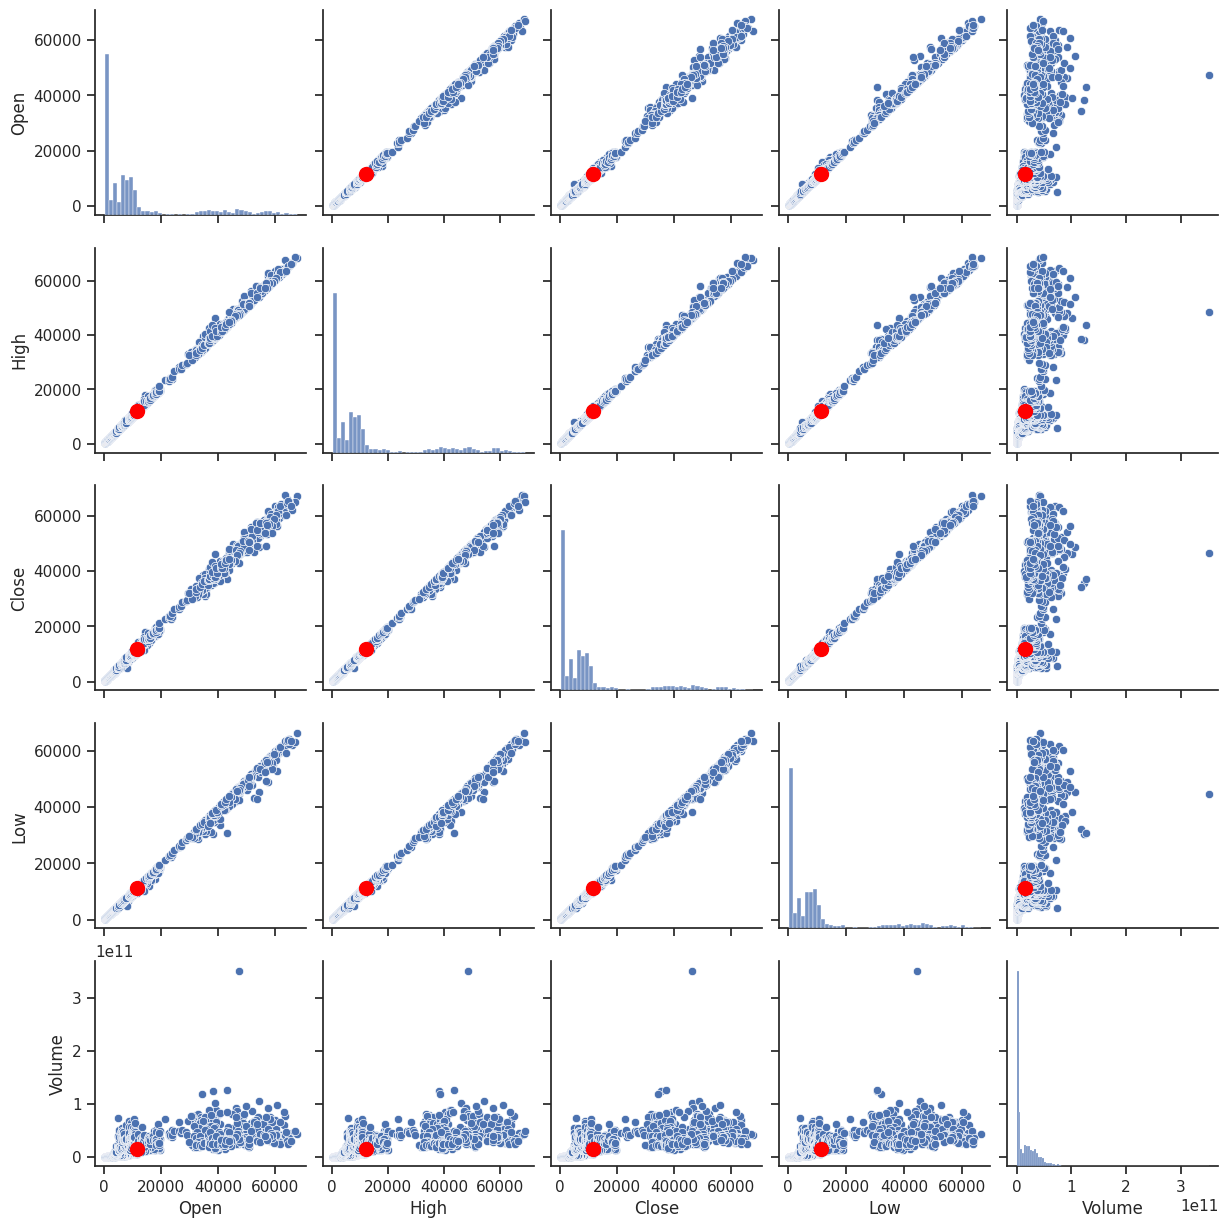

In [105]:
sns.set(style="ticks")
pair_plot = sns.pairplot(data)

variable_means = data.mean()

for i, ax_row, in enumerate(pair_plot.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            x = variable_means[x_label]
            y = variable_means[y_label]
            ax.scatter(x, y, color="red", marker="o", s=100)
            
plt.show()

In [106]:
variable_means

Open      1.166860e+04
High      1.198103e+04
Close     1.168289e+04
Low       1.132560e+04
Volume    1.484704e+10
dtype: float64

Create the covariance matrix

In [107]:
cov_matrix = data.cov()
cov_matrix

,Open,High,Close,Low,Volume
Open,2.664627e+08,2.734472e+08,2.662556e+08,2.581034e+08,2.360339e+14
High,2.734472e+08,2.808831e+08,2.735483e+08,2.649777e+08,2.435775e+14
Close,2.662556e+08,2.735483e+08,2.666752e+08,2.582769e+08,2.358148e+14
Low,2.581034e+08,2.649777e+08,2.582769e+08,2.504491e+08,2.264171e+14
Volume,2.360339e+14,2.435775e+14,2.358148e+14,2.264171e+14,3.979303e+20


create the inverse matrix

In [108]:
try:
    cov_matrix_inverse = np.linalg.inv(cov_matrix)
    df_matrix_inverse = pd.DataFrame(cov_matrix_inverse)
    print(df_matrix_inverse)
except np.linalg.LinAlgError:
    # Handle the case where the matrix is not invertible (singular or nearly singular)
    cov_matrix_inverse = None

              0             1             2             3             4
0  7.442173e-06 -7.912751e-06  5.067481e-06 -4.523824e-06  1.177887e-16
1 -7.912751e-06  1.231518e-05 -8.536302e-06  3.967529e-06 -4.360549e-14
2  5.067481e-06 -8.536302e-06  9.348072e-06 -5.826441e-06 -5.162914e-15
3 -4.523824e-06  3.967529e-06 -5.826441e-06  6.435546e-06  4.578369e-14
4  1.177887e-16 -4.360549e-14 -5.162914e-15  4.578369e-14  6.143781e-21


Check the result finding the identity matrix

In [109]:
matrix_identity = cov_matrix_inverse @ cov_matrix
df_identity_inverse = pd.DataFrame(matrix_identity)
print(df_identity_inverse)

           Open          High         Close           Low        Volume
0  1.000000e+00 -2.066095e-14 -1.669296e-15 -5.305989e-13 -3.523787e-07
1  2.440777e-13  1.000000e+00 -3.665132e-13  8.287540e-13  5.407862e-07
2 -1.660479e-13 -1.191403e-13  1.000000e+00 -3.819269e-13 -4.714305e-07
3  1.704035e-13  2.730610e-13  8.604196e-14  1.000000e+00  9.359640e-08
4 -1.430746e-22 -4.722169e-22  7.877241e-22 -5.291994e-22  1.000000e+00


B

In [110]:
Z = data.apply(lambda value: value - variable_means, axis=1)
Z.head()

,Open,High,Close,Low,Volume
0,-11202.736258,-11512.860938,-11225.558083,-10873.174910,-1.482598e+10
1,-11211.740287,-11524.174964,-11258.452096,-10912.492903,-1.481256e+10
2,-11244.497275,-11553.199958,-11288.096108,-10941.064894,-1.480912e+10
3,-11273.927268,-11557.738959,-11273.988106,-10935.713911,-1.481018e+10
4,-11260.515281,-11568.608954,-11284.071084,-10932.415907,-1.482046e+10


In [111]:
Zt = Z.T
Zt

,0,1,2,3,4,5,6,7,8,9,...,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746
Open,-1.120274e+04,-1.121174e+04,-1.124450e+04,-1.127393e+04,-1.126052e+04,-1.126950e+04,-1.126651e+04,-1.123285e+04,-1.124544e+04,-1.125717e+04,...,2.766697e+04,2.947224e+04,2.927624e+04,3.012605e+04,3.052281e+04,2.957753e+04,2.940551e+04,3.069578e+04,3.121805e+04,3.229008e+04
High,-1.151286e+04,-1.152417e+04,-1.155320e+04,-1.155774e+04,-1.156861e+04,-1.157412e+04,-1.153948e+04,-1.154492e+04,-1.155751e+04,-1.156610e+04,...,2.948442e+04,2.930650e+04,3.021471e+04,3.033552e+04,3.026013e+04,2.947338e+04,3.114367e+04,3.091247e+04,3.215082e+04,3.300148e+04
Close,-1.122556e+04,-1.125845e+04,-1.128810e+04,-1.127399e+04,-1.128407e+04,-1.128074e+04,-1.124710e+04,-1.125969e+04,-1.127132e+04,-1.127847e+04,...,2.946104e+04,2.926849e+04,3.011826e+04,3.050776e+04,2.956493e+04,2.939510e+04,3.067592e+04,3.121006e+04,3.227804e+04,3.271307e+04
Low,-1.087317e+04,-1.091249e+04,-1.094106e+04,-1.093571e+04,-1.093242e+04,-1.092847e+04,-1.092940e+04,-1.090446e+04,-1.091613e+04,-1.092559e+04,...,2.769675e+04,2.933727e+04,2.897680e+04,3.027707e+04,2.967916e+04,2.934245e+04,2.962268e+04,3.055191e+04,3.140057e+04,3.238627e+04
Volume,-1.482598e+10,-1.481256e+10,-1.480912e+10,-1.481018e+10,-1.482046e+10,-1.482291e+10,-1.480194e+10,-1.481641e+10,-1.482023e+10,-1.482558e+10,...,2.476988e+10,7.162561e+09,1.957453e+10,4.817813e+09,5.280907e+09,9.768504e+09,1.715761e+10,1.039590e+10,1.619595e+10,1.553238e+10


In [112]:
Zt_Z = Zt @ Z
Zt_Z

,Open,High,Close,Low,Volume
Open,7.317064e+11,7.508860e+11,7.311378e+11,7.087519e+11,6.481491e+17
High,7.508860e+11,7.713051e+11,7.511636e+11,7.276288e+11,6.688638e+17
Close,7.311378e+11,7.511636e+11,7.322900e+11,7.092285e+11,6.475475e+17
Low,7.087519e+11,7.276288e+11,7.092285e+11,6.877333e+11,6.217413e+17
Volume,6.481491e+17,6.688638e+17,6.475475e+17,6.217413e+17,1.092717e+24


In [113]:
n=len(Z)
cov_Z = Zt_Z.apply(lambda value: value / (n-1) , axis=1)
print("manual calculate covariance")
display(cov_Z)
print("pandas calculate covariance")
display(cov_matrix)

manual calculate covariance


,Open,High,Close,Low,Volume
Open,2.664627e+08,2.734472e+08,2.662556e+08,2.581034e+08,2.360339e+14
High,2.734472e+08,2.808831e+08,2.735483e+08,2.649777e+08,2.435775e+14
Close,2.662556e+08,2.735483e+08,2.666752e+08,2.582769e+08,2.358148e+14
Low,2.581034e+08,2.649777e+08,2.582769e+08,2.504491e+08,2.264171e+14
Volume,2.360339e+14,2.435775e+14,2.358148e+14,2.264171e+14,3.979303e+20


pandas calculate covariance


,Open,High,Close,Low,Volume
Open,2.664627e+08,2.734472e+08,2.662556e+08,2.581034e+08,2.360339e+14
High,2.734472e+08,2.808831e+08,2.735483e+08,2.649777e+08,2.435775e+14
Close,2.662556e+08,2.735483e+08,2.666752e+08,2.582769e+08,2.358148e+14
Low,2.581034e+08,2.649777e+08,2.582769e+08,2.504491e+08,2.264171e+14
Volume,2.360339e+14,2.435775e+14,2.358148e+14,2.264171e+14,3.979303e+20


The relation between Zt*Z with the covariance is:

(n-1)(cov(data)) = Zt*Z 

C

In [114]:

# Example covariance matrix (replace this with your actual covariance matrix)
cov_matrix = data.cov()

# Define the mean vector (replace with your actual mean vector if needed)
mean_vector = data.mean()

# Define a custom function to calculate Mahalanobis distance for a row
def mahalanobis_distance(row):
    row_vector = np.array(row)
    return distance.mahalanobis(row_vector, mean_vector, np.linalg.inv(cov_matrix))

data2 = data
mahalanobis_distances = data2.apply(mahalanobis_distance, axis=1)


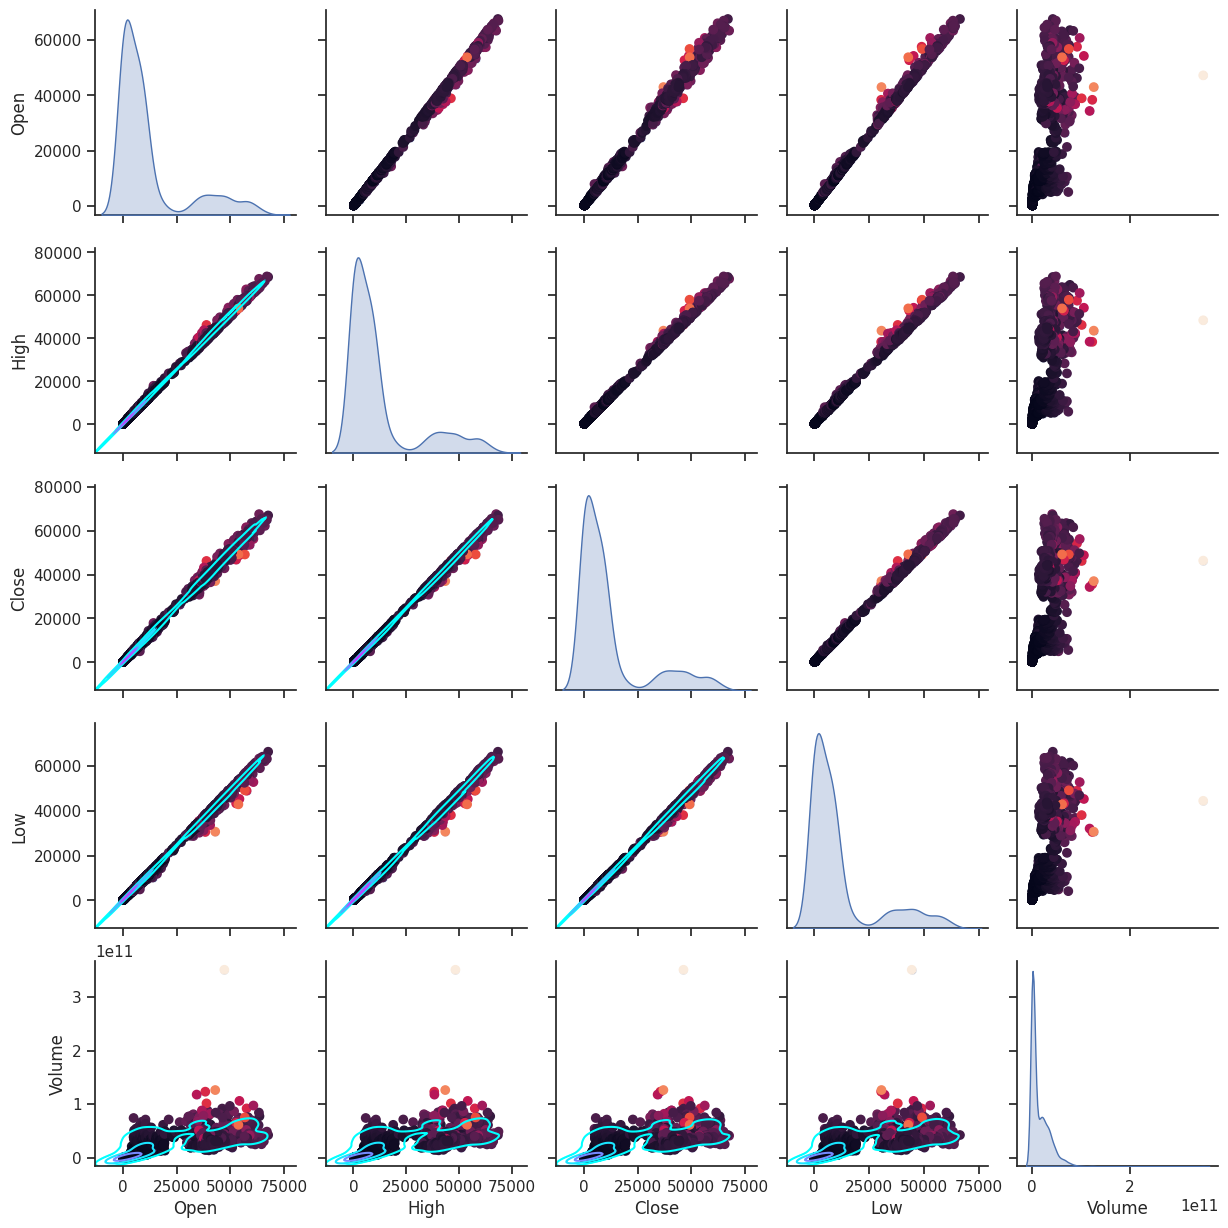

In [115]:
sns.set(style="ticks")
pair_plot = sns.pairplot(data2, diag_kind="kde")

# Map lower triangular plots with Mahalanobis distances using KDE
for i, ax_row in enumerate(pair_plot.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            x = data2[x_label]
            y = data2[y_label]
            ax.scatter(x, y, c=mahalanobis_distances, cmap=None, marker=None, s=None)

# Corrected code to set the colormap for KDE plots
pair_plot.map_lower(sns.kdeplot, levels=4, color=".2", cmap="cool")

plt.show()

D

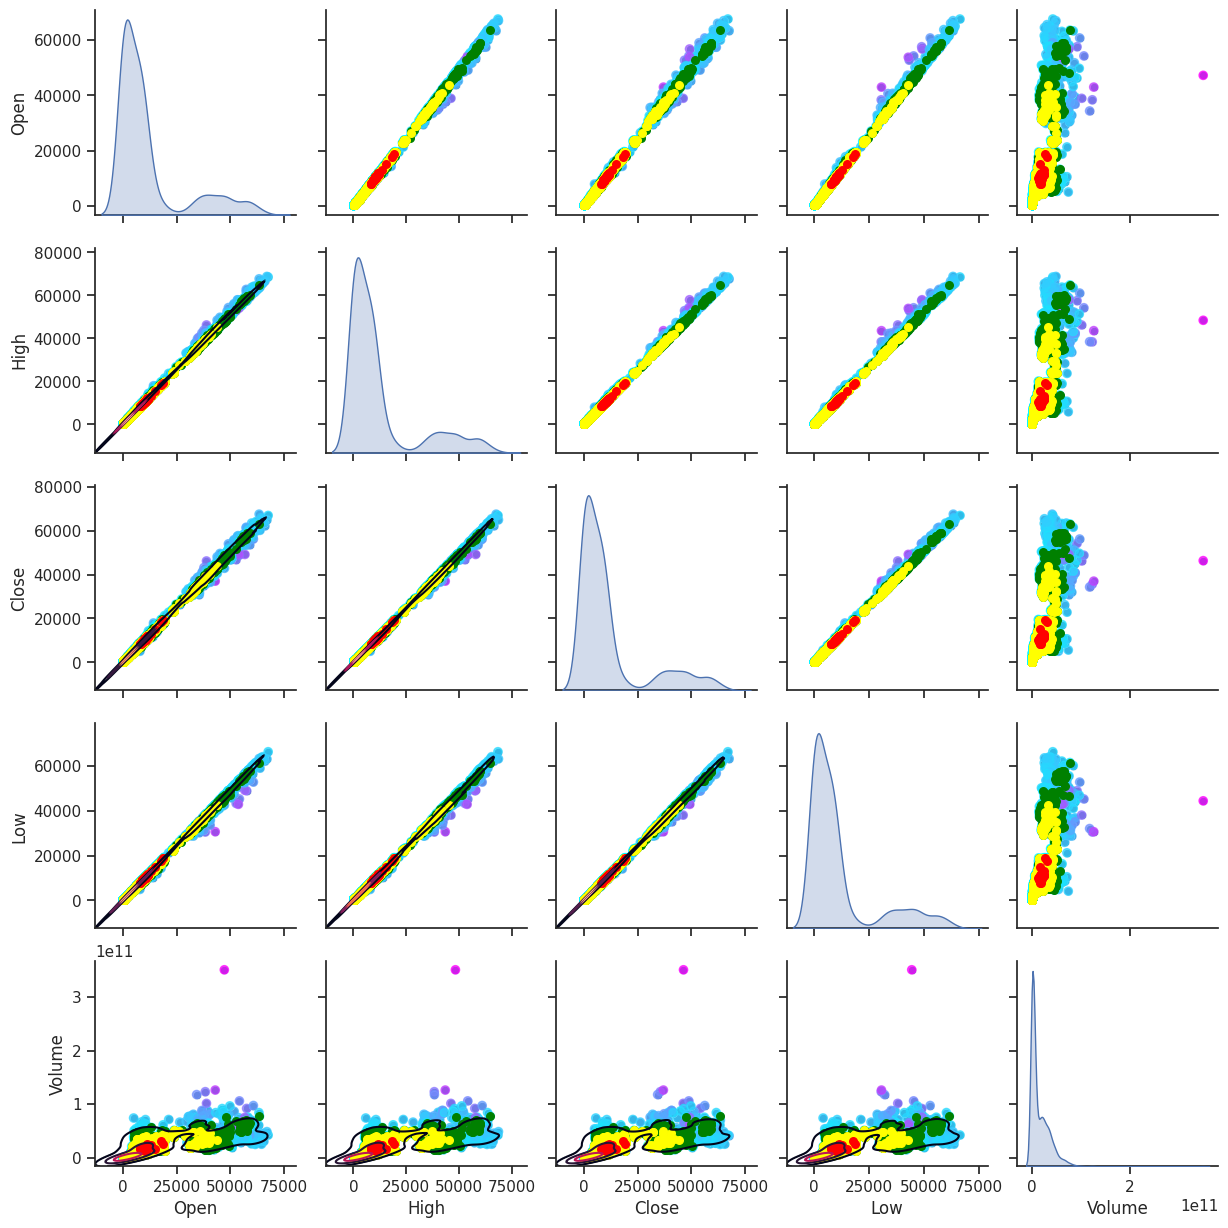

In [125]:
vector_medias = data2.mean()
Z = data2 - vector_medias

# Calcula la matriz inversa de covarianzas
matriz_covarianzas = data2.cov()
matriz_cov_inv = np.linalg.inv(matriz_covarianzas)

def mahalanobis_distance(observation, mean, cov_inv):
    diff = observation - mean
    return np.sqrt(np.dot(np.dot(diff, cov_inv), diff))

# Calcula las distancias de Mahalanobis para todas las observaciones
distancias_mahalanobis = Z.apply(lambda row: mahalanobis_distance(row, vector_medias, matriz_cov_inv), axis=1)

# Configura el estilo de seaborn
sns.set(style="ticks")

# Crea un pair plot
pair_plot = sns.pairplot(data2, diag_kind="kde")

# Itera sobre los subplots y colorea según la distancia de Mahalanobis
for i, ax_row in enumerate(pair_plot.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            x = data2[x_label]
            y = data2[y_label]
            
            # Colorea las observaciones según la distancia de Mahalanobis
            ax.scatter(x, y, c=distancias_mahalanobis, cmap='cool', alpha=0.7)

            radio = 3
            bola_indices = distancias_mahalanobis <= radio
            ax.scatter(x[bola_indices], y[bola_indices], c='green', marker='o', s=30, label='Dentro de la bola')
            # Identifica la bola de radio 1
            
            # Identifica la bola de radio 2
            radio = 2
            bola_indices = distancias_mahalanobis <= radio
            ax.scatter(x[bola_indices], y[bola_indices], c='yellow', marker='o', s=30, label='Dentro de la bola')
            # Identifica la bola de radio 1
            radio = 1
            bola_indices = distancias_mahalanobis <= radio
            ax.scatter(x[bola_indices], y[bola_indices], c='red', marker='o', s=30, label='Dentro de la bola')


# Corrige el código para establecer el colormap en las gráficas KDE
pair_plot.map_lower(sns.kdeplot, levels=4, color="red", cmap=None)

# Muestra la gráfica
plt.show()